# Pathological Gait Analysis

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from skimage.metrics import structural_similarity as ssim
import json

from freq_mag_analyzer import FrequencyMagnitudeAnalyzer
from preprocess import get_data, process_data
from plot import plot_sig_fft_wave
from interpolate import interpolate_array, intp_wavelet
from export_image import export_img

## Import data

### Healthy Control

#### Import raw data and store as cycles

In [2]:
# dir_HC = "dataset/Sujets sains"
# df_meta_cycle_HC, left_cycle_HC, right_cycle_HC = get_data(directory=dir_HC, disabled=False)

#### Convert cycles to signals

In [3]:
# def convert_keys_to_int(obj):
#     if isinstance(obj, dict):
#         return {int(key): convert_keys_to_int(value) for key, value in obj.items()}  # Convert keys to int
#     elif isinstance(obj, list):
#         return [convert_keys_to_int(element) for element in obj]
#     else:
#         return obj
    
# df_meta_cycle_HC = pd.read_csv("df_meta_cycle_HC.csv", index_col=0)

# with open("left_cycle_HC.json", "r") as openfile:
#     loaded_data = json.load(openfile)
#     left_cycle_HC = convert_keys_to_int(loaded_data)
# with open("right_cycle_HC.json", "r") as openfile:
#     loaded_data = json.load(openfile)
#     right_cycle_HC = convert_keys_to_int(loaded_data)

In [4]:
# df_meta_signal_HC, dict_left_signal_HC, dict_right_signal_HC = process_data(df_meta_cycle_HC, left_cycle_HC, right_cycle_HC)
# df_meta_signal_HC['Disease Group'] = "HC"

#### Export signals to files (CSV and JSON)

In [5]:
# df_meta_signal_HC.to_csv('df_meta_signal3_HC.csv')

# def convert_numpy(obj):
#     if isinstance(obj, np.ndarray):
#         return obj.tolist()  # Convert numpy array to list
#     elif isinstance(obj, np.int64):
#         return int(obj)  # Convert numpy.int64 to int
#     elif isinstance(obj, dict):
#         return {convert_numpy(key): convert_numpy(value) for key, value in obj.items()}
#     elif isinstance(obj, list):
#         return [convert_numpy(element) for element in obj]
#     else:
#         return obj
    
# converted_data = convert_numpy(dict_left_signal_HC)
# json_left = json.dumps(converted_data)
# with open("dict_left_signal3_HC.json", "w") as outfile:
#     outfile.write(json_left)

# converted_data = convert_numpy(dict_right_signal_HC)
# json_right = json.dumps(converted_data)
# with open("dict_right_signal3_HC.json", "w") as outfile:
#     outfile.write(json_right)

#### Import CSV and JSON

In [2]:
def convert_keys_to_int(obj):
    if isinstance(obj, dict):
        return {int(key): convert_keys_to_int(value) for key, value in obj.items()}  # Convert keys to int
    elif isinstance(obj, list):
        return [convert_keys_to_int(element) for element in obj]
    else:
        return obj
    
df_meta_signal_HC = pd.read_csv("df_meta_signal3_HC.csv", index_col=0)

with open("dict_left_signal3_HC.json", "r") as openfile:
    loaded_data = json.load(openfile)
    dict_left_signal_HC = convert_keys_to_int(loaded_data)
with open("dict_right_signal3_HC.json", "r") as openfile:
    loaded_data = json.load(openfile)
    dict_right_signal_HC = convert_keys_to_int(loaded_data)

### Pathological Subject

#### Import raw data and store as cycles

In [6]:
# # dir_PT = "dataset/Sujets patho"
# # df_meta_cycle_PT, left_cycle_PT, right_cycle_PT = get_data(dir_PT, True)

# df_meta_cycle_PT = pd.read_csv("df_meta_cycle_PT.csv", index_col=0)

# with open("left_cycle_PT.json", "r") as openfile:
#     loaded_data = json.load(openfile)
#     left_cycle_PT = convert_keys_to_int(loaded_data)
# with open("right_cycle_PT.json", "r") as openfile:
#     loaded_data = json.load(openfile)
#     right_cycle_PT = convert_keys_to_int(loaded_data)

# df_meta_cycle_PT['id_patient'] = df_meta_cycle_PT['id_patient'].str.replace('_', ' ')
# df_meta_cycle_PT['id_patient'] = df_meta_cycle_PT['id_patient'].str.replace('1', '')

# patient_disease = pd.read_csv("Label_disease_per_patient.csv", index_col=0)
# patient_disease = patient_disease.set_index('id_patient')
# patient_disease.index = patient_disease.index.str.replace('DA COSTA Rogerio', 'DA COSTA ROMAO Rogerio')
# patient_disease.index = patient_disease.index.str.replace('GOUTTE Michellee', 'GOUTTE Michele')
# patient_disease.index = patient_disease.index.str.replace('QIU Shouqing', 'QIU Shouyqing')

#### Convert cycles to signals

In [7]:
# df_meta_signal_PT, dict_left_signal_PT, dict_right_signal_PT = process_data(df_meta_cycle_PT, left_cycle_PT, right_cycle_PT)

# df_meta_signal_PT = pd.concat([df_meta_signal_PT, patient_disease], axis=1)
# df_meta_signal_PT = df_meta_signal_PT.dropna()

# id_patient_map = {name: ''.join(part[0] for part in name.split()) for name in dict_left_signal_PT.keys()}

# df_meta_signal_PT['initial_patient'] = df_meta_signal_PT.index.map(lambda x: id_patient_map.get(x))

# df_metasig_PT = df_meta_signal_PT.set_index('initial_patient')
# dict_leftsig_PT = {id_patient_map[name]: value for name, value in dict_left_signal_PT.items()}
# dict_rightsig_PT = {id_patient_map[name]: value for name, value in dict_right_signal_PT.items()}

# disease_map = [
#     (df_metasig_PT['Label_disease'].str.contains('mip', case=False), 'Hemi'),
#     (df_metasig_PT['Label_disease'].str.contains('trap', case=False), 'Tetra'),
#     (df_metasig_PT['Label_disease'].str.contains('Para', case=False), 'Para')
# ]

# # Apply mapping rules and create new column
# df_metasig_PT['Disease Group'] = np.select([condition for condition, _ in disease_map], [value for _, value in disease_map])

# impacted_side = [
#     (df_metasig_PT['Disease Group'].str.contains('Tetra', case=False), 'Both'),
#     (df_metasig_PT['Disease Group'].str.contains('Para', case=False), 'Both'),
#     (df_metasig_PT['Label_disease'].str.contains('droite', case=False), 'Right'),
#     (df_metasig_PT['Label_disease'].str.contains('gauche', case=False), 'Left')
#     ]

# # Apply mapping rules and create new column
# df_metasig_PT['Impacted Side'] = np.select([condition for condition, _ in impacted_side], [value for _, value in impacted_side])


#### Export signals to files (CSV and JSON)

In [8]:
# df_metasig_PT.to_csv('df_metasig3_PT.csv')

# json_left = json.dumps(dict_leftsig_PT)
# with open("dict_leftsig3_PT.json", "w") as outfile:
#     outfile.write(json_left)

# json_right = json.dumps(dict_rightsig_PT)
# with open("dict_rightsig3_PT.json", "w") as outfile:
#     outfile.write(json_right)

#### Import CSV and JSON

In [3]:
df_metasig_PT = pd.read_csv("df_metasig3_PT.csv", index_col=0)

with open("dict_leftsig3_PT.json", "r") as openfile:
    dict_leftsig_PT = json.load(openfile)
with open("dict_rightsig3_PT.json", "r") as openfile:
    dict_rightsig_PT = json.load(openfile)

## Part 1. Frequency Analysis & Gaussian Mixture Model

### Select subjects

In [11]:
# HC
df_patient_HC = df_meta_signal_HC[df_meta_signal_HC["Disease Group"] == "HC"]


### Fourier Transform & Histogram

/Users/ardiansyahnugraha/Documents/Codes/ip-paris-gait-analysis/freq_mag_analyzer.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.top_freq_df = pd.concat([self.top_freq_df, df], axis=0)


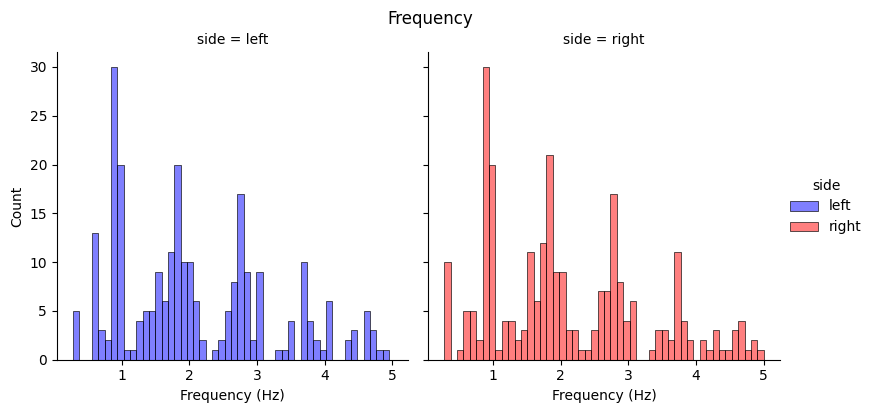

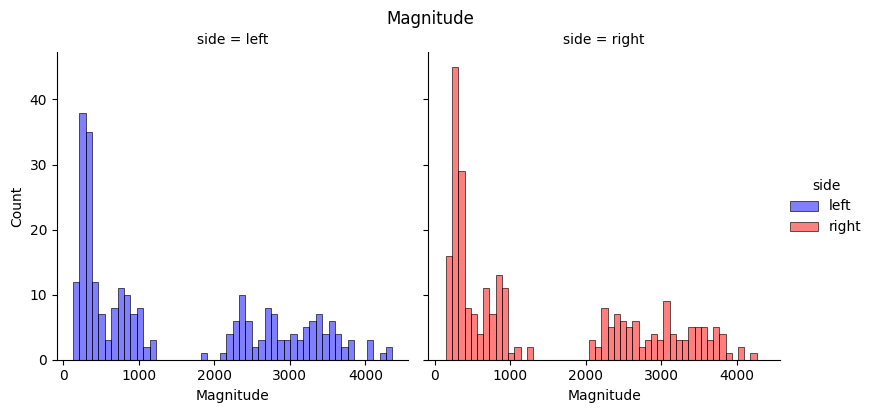

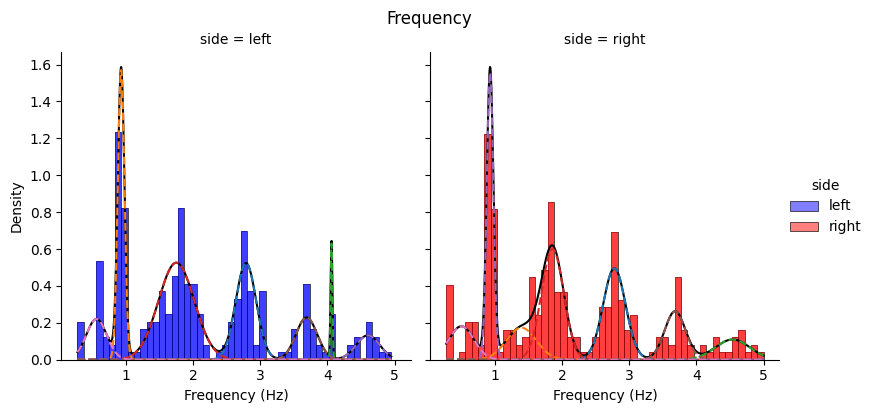

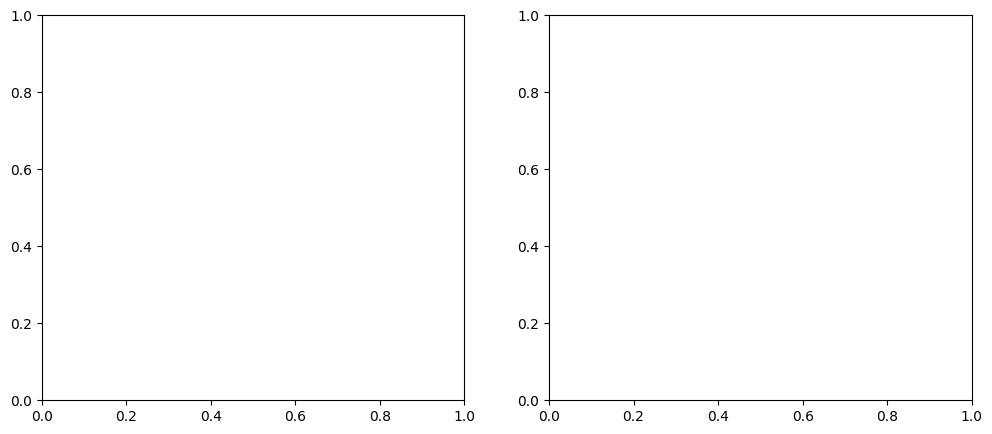

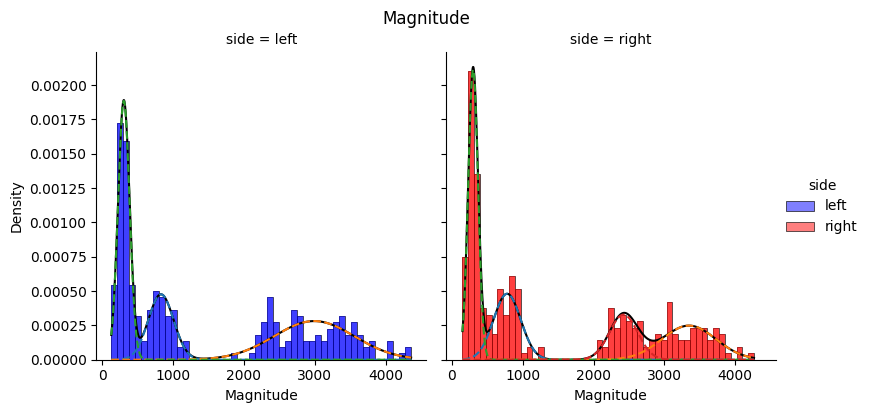

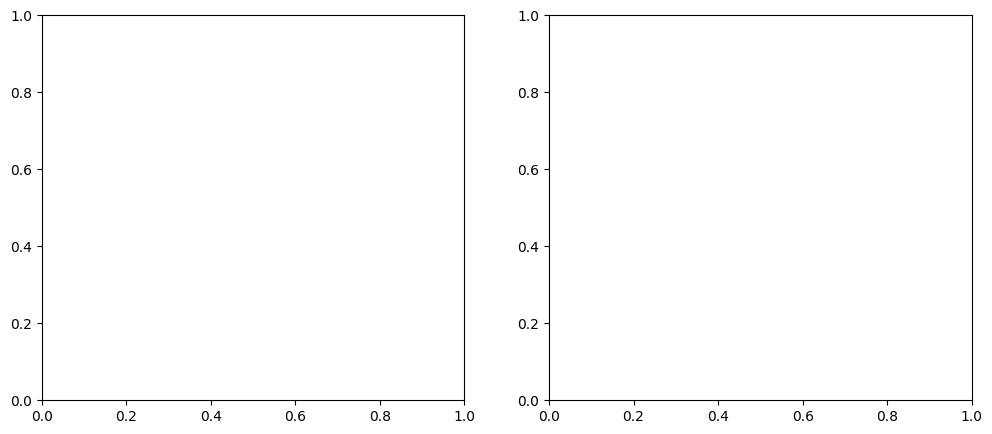

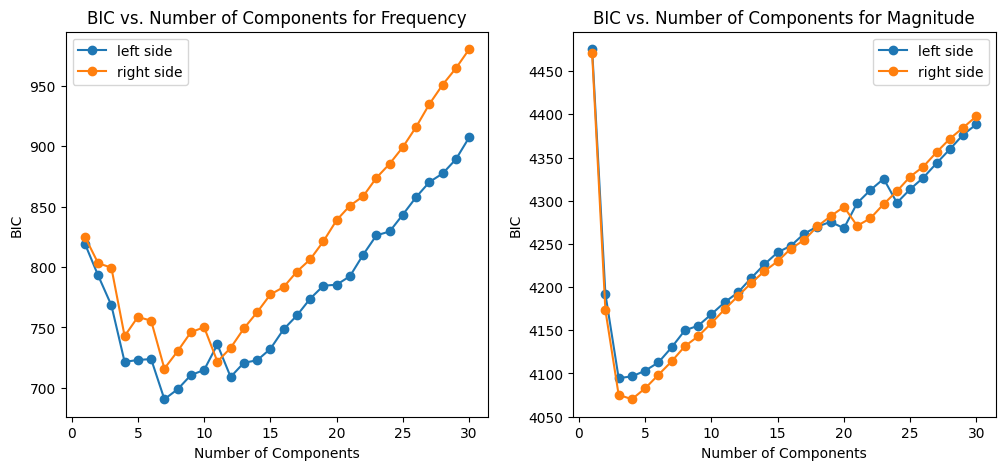

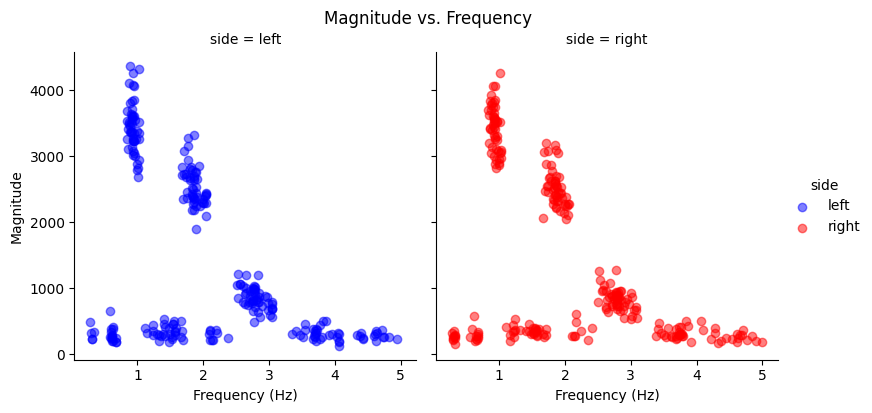

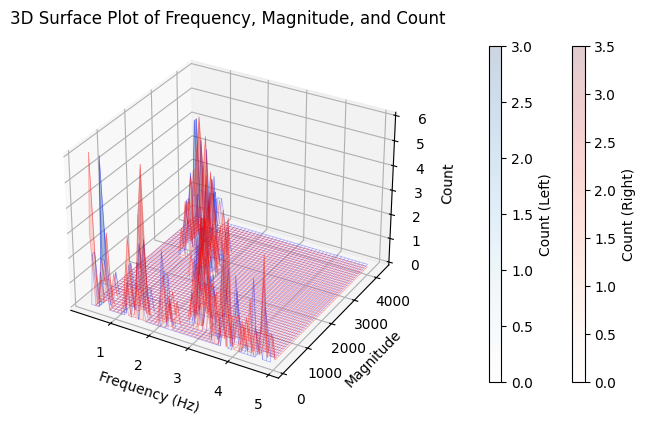

In [32]:
# HC
bins = 50
analyzer = FrequencyMagnitudeAnalyzer(df_patient_HC, dict_left_signal_HC, dict_right_signal_HC)
df_HC = analyzer.analyze(disease='HC', top=5)
analyzer.plot_histograms(disease='HC', bins=bins)
freq_bics, mag_bics = analyzer.plot_gmm(disease='HC', bins=bins, max_n_components=30)
analyzer.plot_bic_scores(freq_bics, mag_bics)
analyzer.plot_scatter(disease='HC')
analyzer.plot_3d_surface(disease='HC', freq_bin_size=bins, mag_bin_size=bins)

In [33]:
df_HC

,id_patient,top freq left,top mag left,top freq right,top mag right
0,1,0.996678,3384.246910,1.003344,2896.290420
1,1,1.993355,2347.576655,2.006689,2272.876893
2,1,2.990033,671.107618,3.010033,530.617656
3,1,1.661130,504.835551,1.672241,299.918772
4,1,1.328904,288.511714,0.334448,294.960866
...,...,...,...,...,...
0,53,0.925926,4083.228331,0.906344,4064.909742
1,53,1.851852,2176.445591,1.812689,2277.634589
2,53,2.777778,480.732539,2.719033,722.597314
3,53,3.703704,299.780545,3.625378,263.757703


In [14]:
# PT
df_patient_PT = df_metasig_PT[df_metasig_PT["Disease Group"] == "Hemi"]

/Users/ardiansyahnugraha/Documents/Codes/ip-paris-gait-analysis/freq_mag_analyzer.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.top_freq_impacted_df = pd.concat([self.top_freq_impacted_df, pd.DataFrame({'id_patient': [id_patient], 'side': [side], 'top freq': [freq], 'top mag': [mag]})], axis=0)


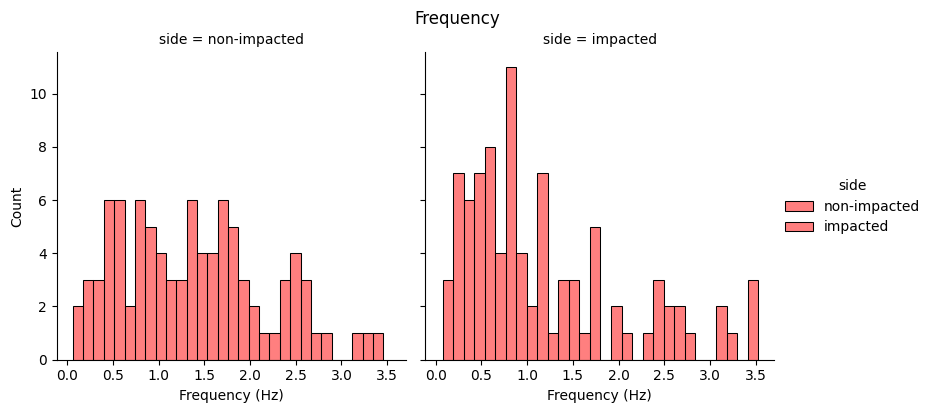

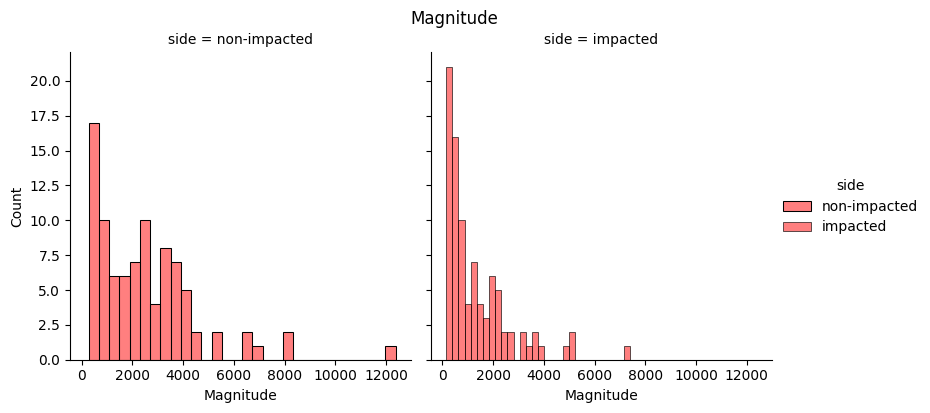

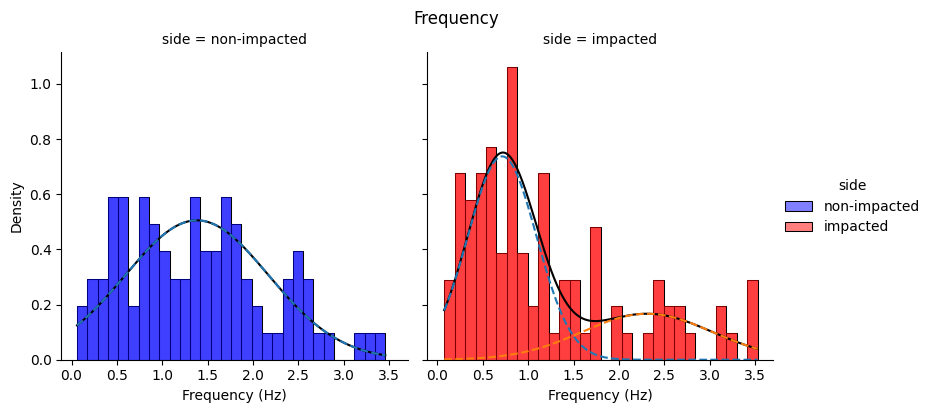

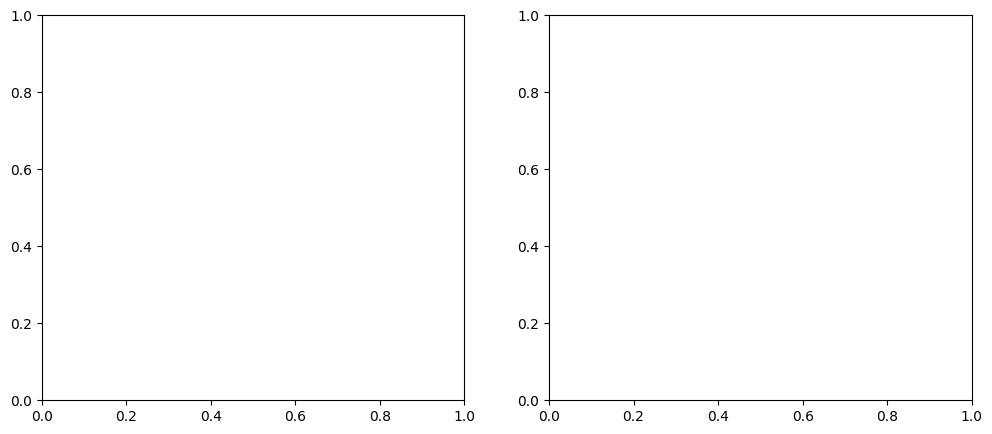

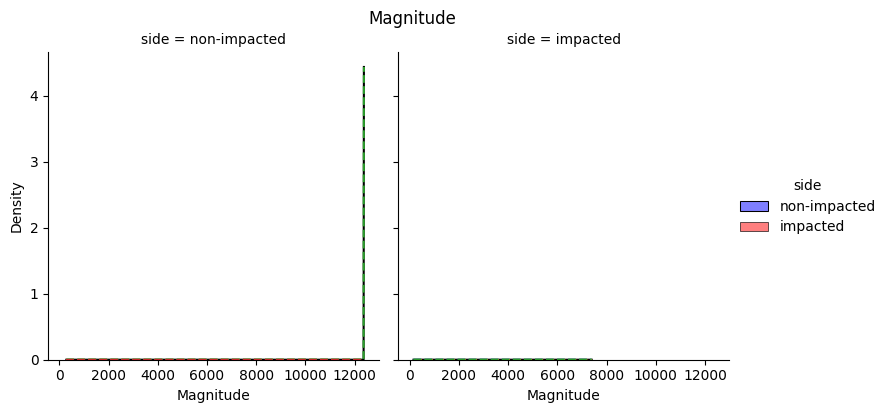

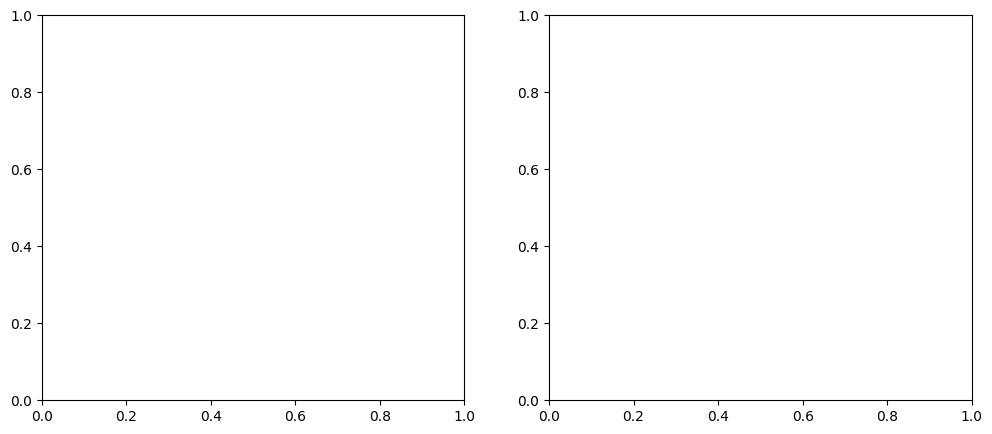

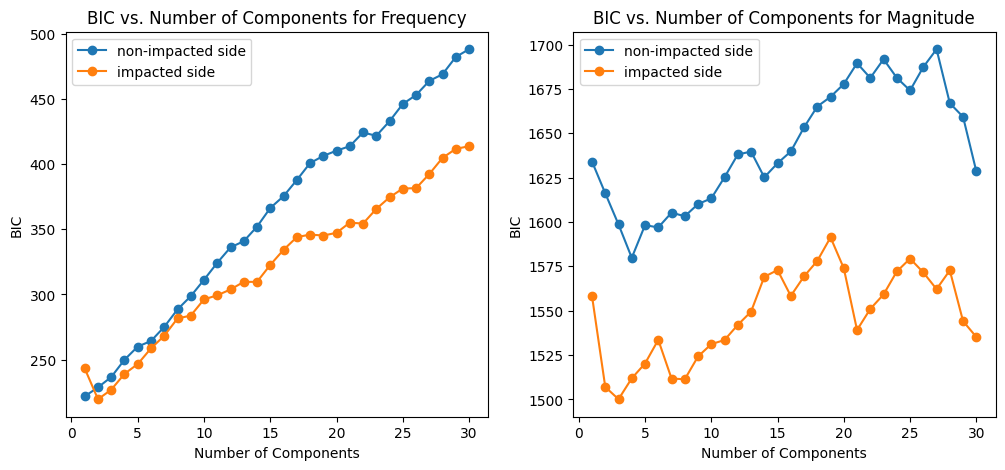

In [15]:
# PT
bins = 30
analyzer_PT = FrequencyMagnitudeAnalyzer(df_patient_PT, dict_leftsig_PT, dict_rightsig_PT)
df_PT = analyzer_PT.analyze(disease='PT', top=5)

analyzer_PT.plot_histograms(disease='PT', bins=bins)
freq_bics, mag_bics = analyzer_PT.plot_gmm(disease='PT', bins=bins, max_n_components=30)
analyzer_PT.plot_bic_scores(freq_bics, mag_bics)
analyzer_PT.plot_scatter(disease='PT')
analyzer_PT.plot_3d_surface(disease='PT', freq_bin_size=bins, mag_bin_size=bins)

### Plot Signal, FFT, and Wavelet (Scalogram)

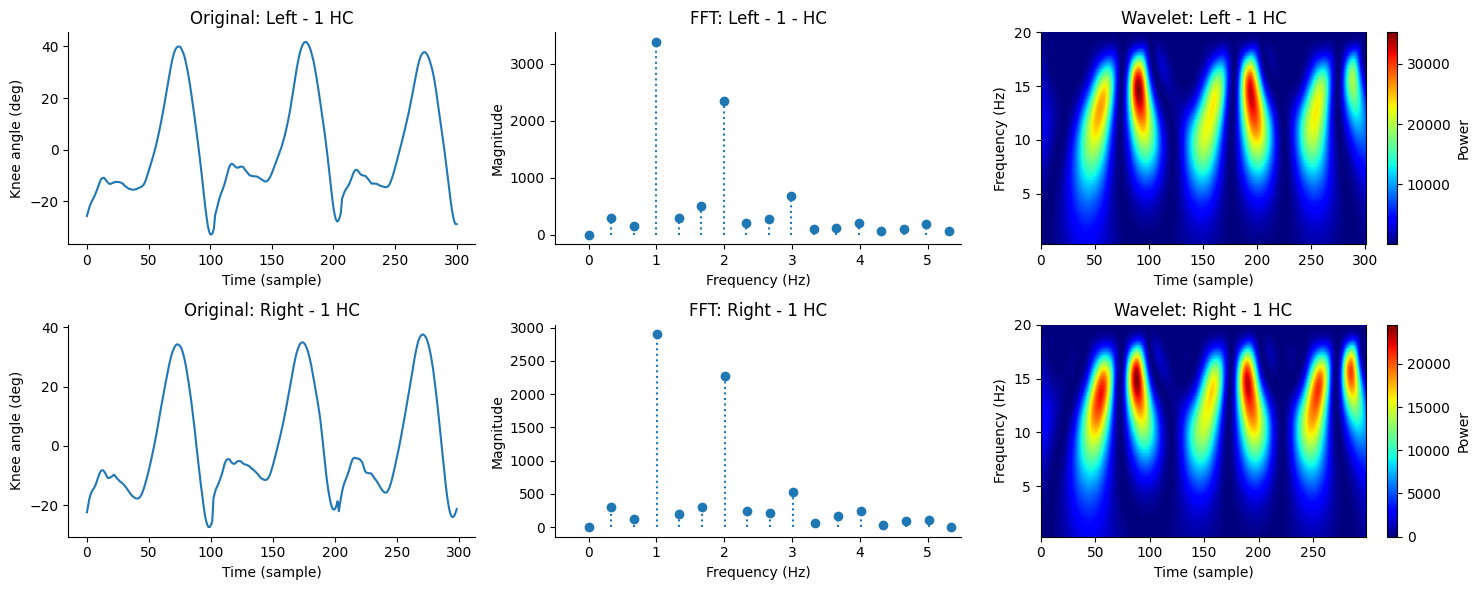

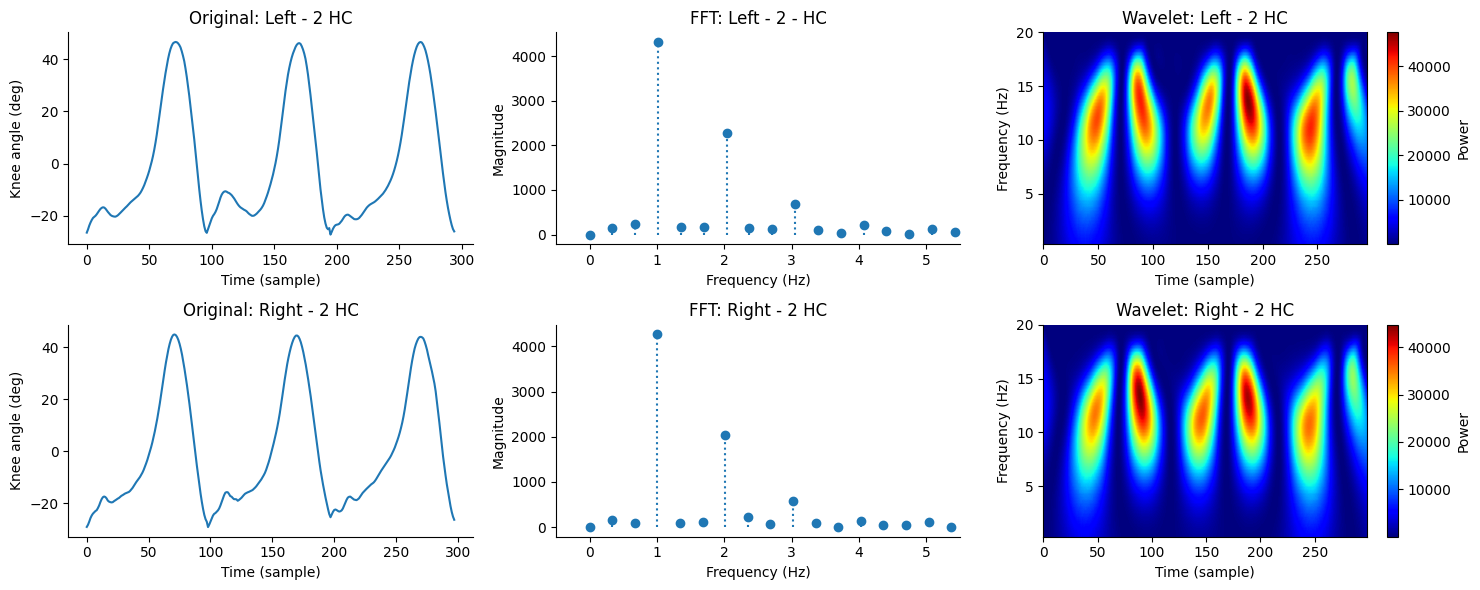

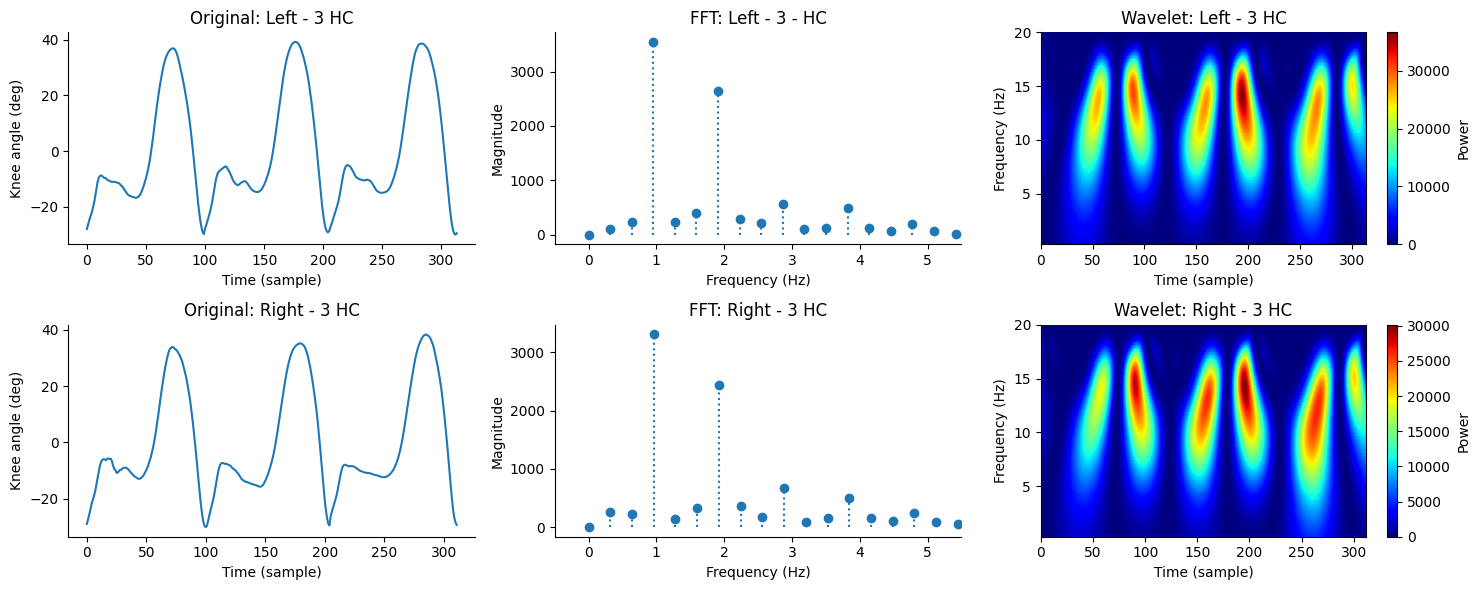

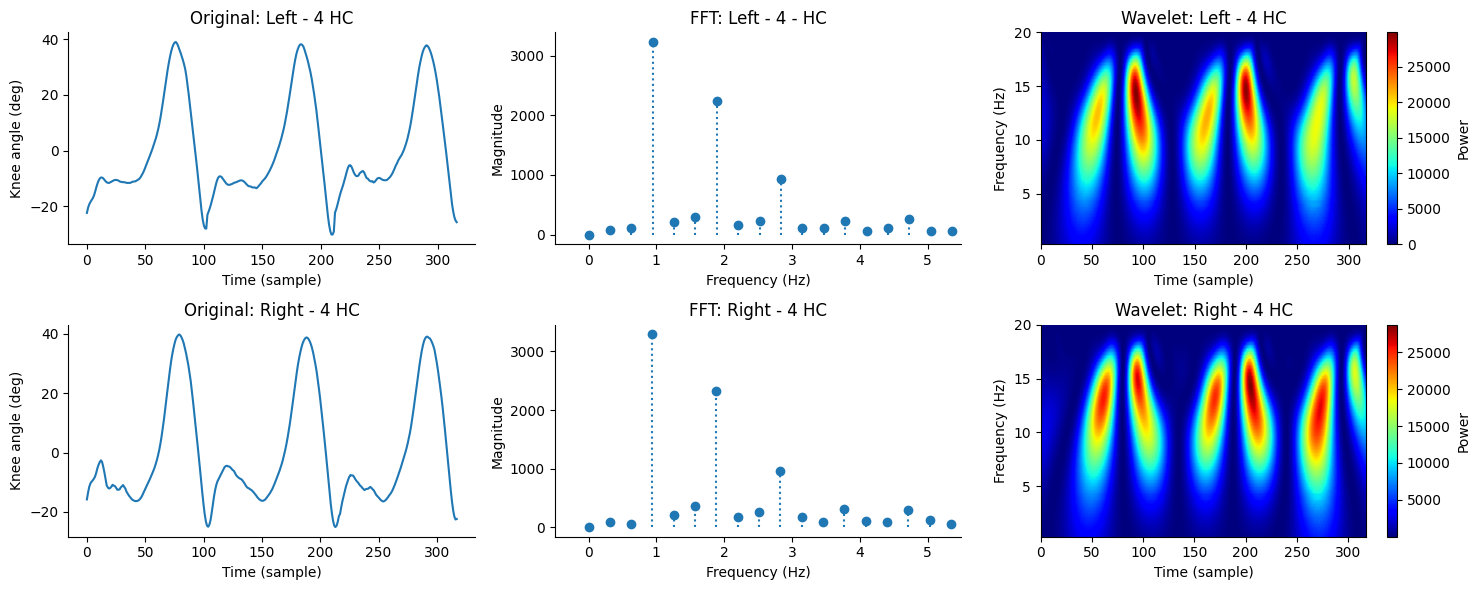

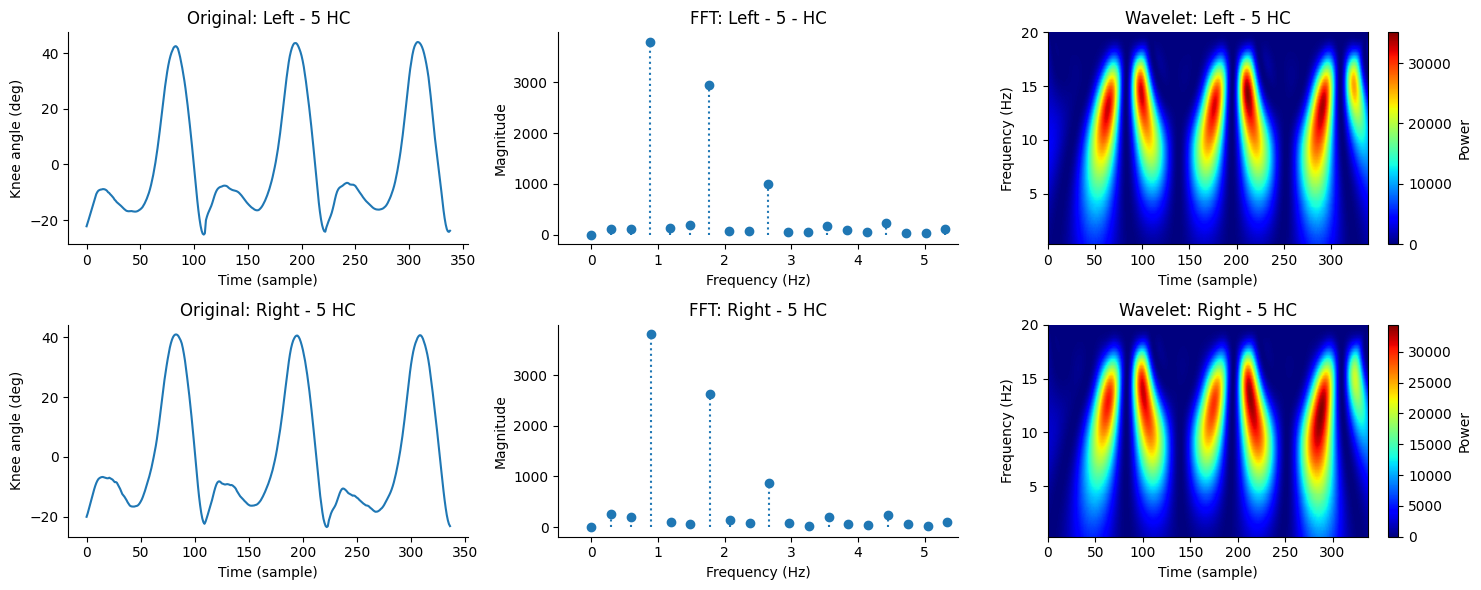

In [4]:
## HC
plot_sig_fft_wave(df_patient=df_meta_signal_HC.head(5), dict_left=dict_left_signal_HC, dict_right=dict_right_signal_HC)

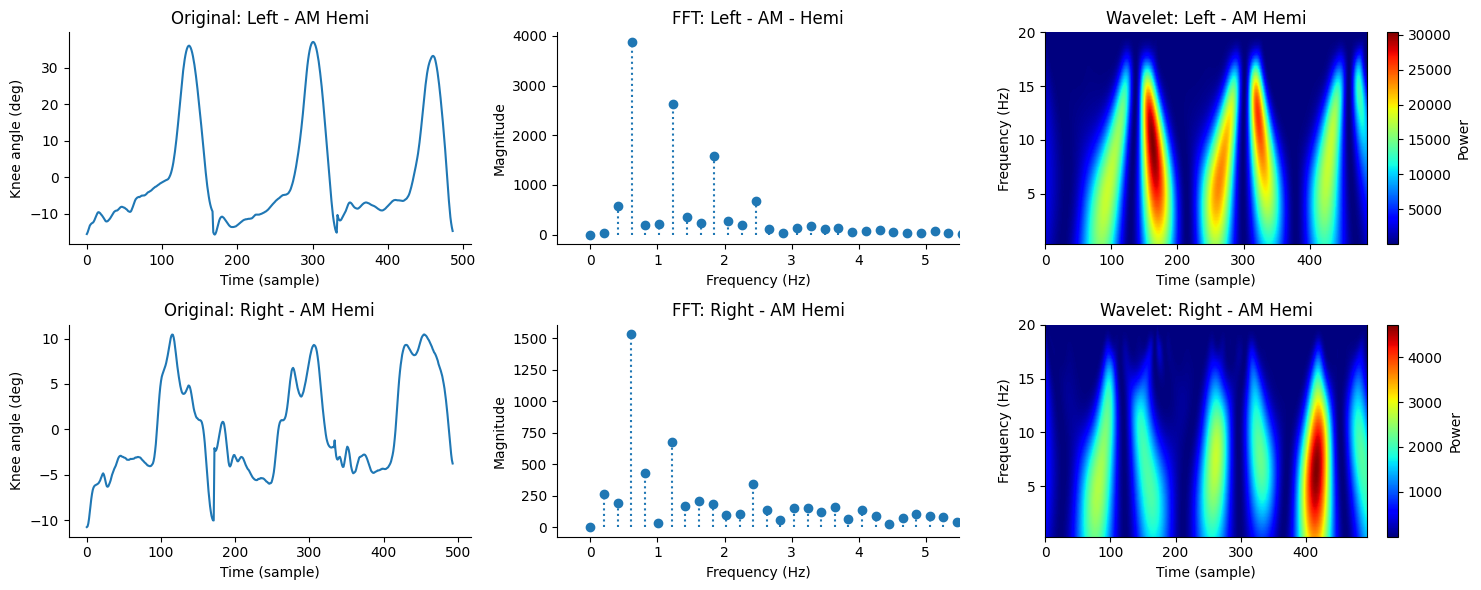

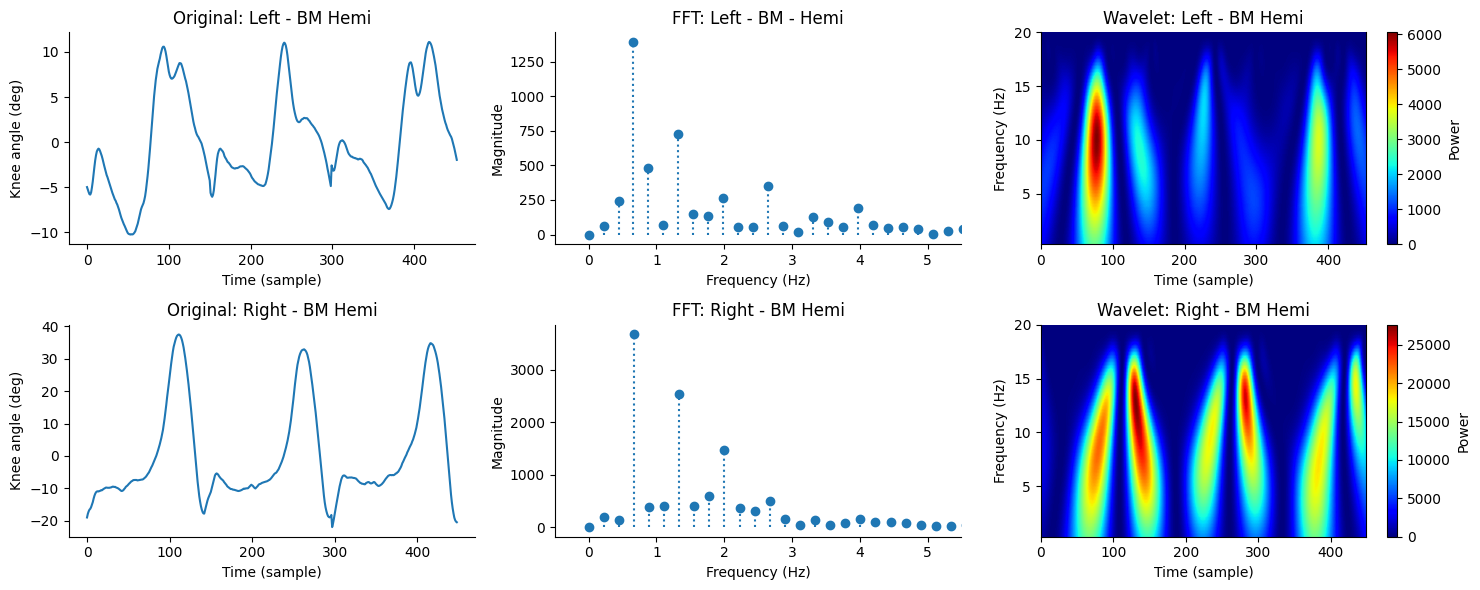

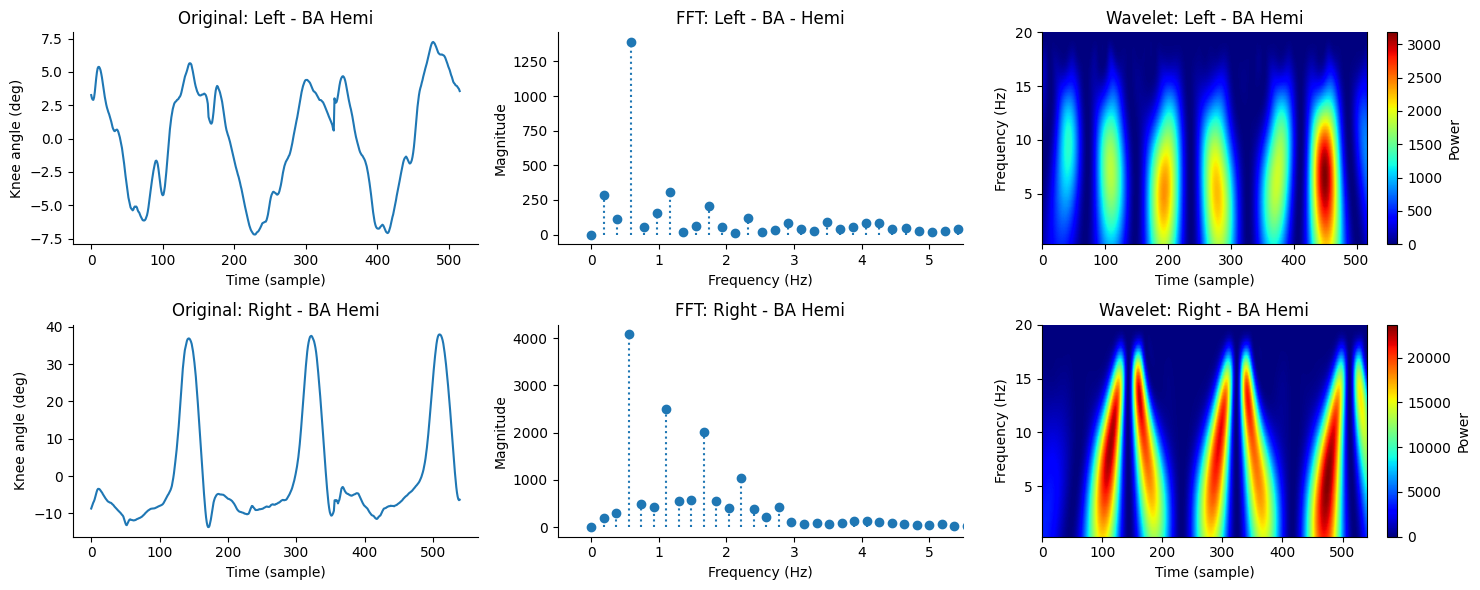

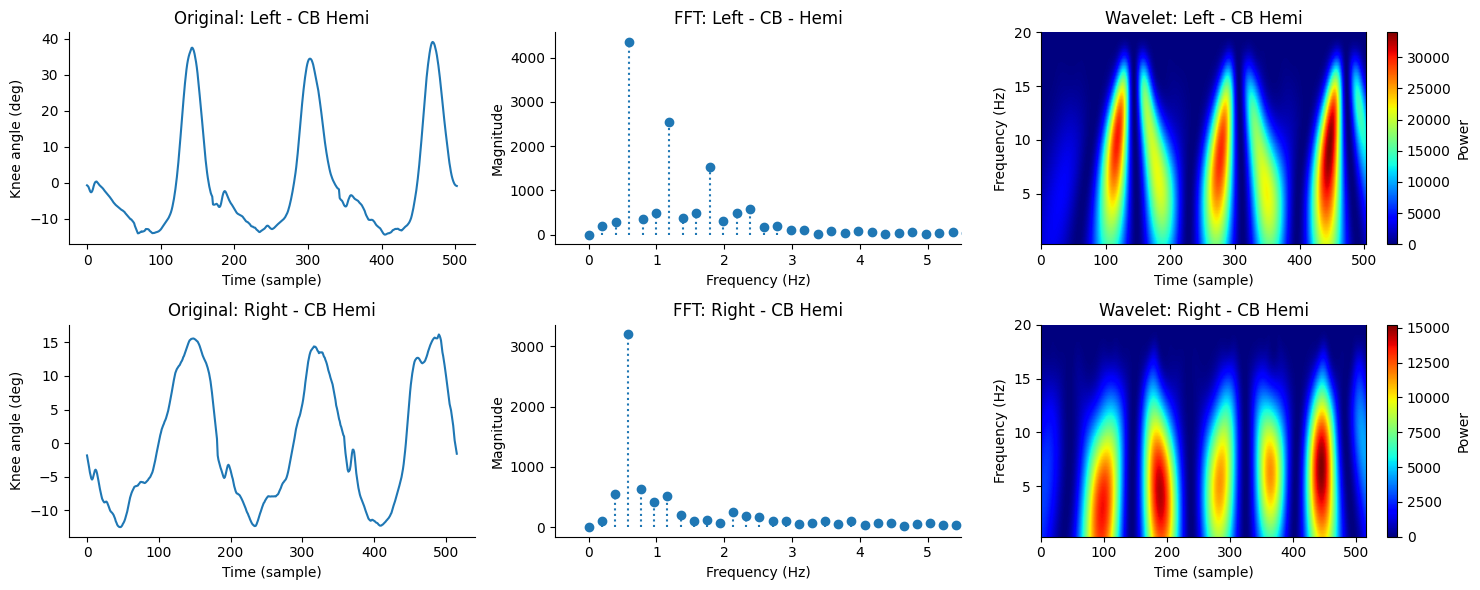

In [5]:
## PT Hemi
plot_sig_fft_wave(df_patient=df_metasig_PT[df_metasig_PT['Disease Group'] == 'Hemi'].head(4), dict_left=dict_leftsig_PT, dict_right=dict_rightsig_PT)

In [18]:
## PT Para
# plot_sig_fft_wave(df_patient=df_metasig_PT[df_metasig_PT['Disease Group'] == 'Para'], dict_left=dict_leftsig_PT, dict_right=dict_rightsig_PT)

In [19]:
## PT Tetra
# plot_sig_fft_wave(df_patient=df_metasig_PT[df_metasig_PT['Disease Group'] == 'Tetra'], dict_left=dict_leftsig_PT, dict_right=dict_rightsig_PT)

### Export Images

In [20]:
# df_patient_HC = df_meta_signal_HC[df_meta_signal_HC["Disease Group"] == "HC"]
# export_img(df_patient=df_patient_HC, dict_left=dict_left_signal_HC, dict_right=dict_right_signal_HC)

### Export Images

In [21]:
# df_patient_PT = df_metasig_PT
# export_img(df_patient=df_patient_PT, dict_left=dict_leftsig_PT, dict_right=dict_rightsig_PT)

## Part 2. Structural Similarity Index

In [6]:
df_metasig_intp_HC = intp_wavelet(df_meta_signal_HC, dict_left_signal_HC, dict_right_signal_HC)
df_metasig_intp_PT = intp_wavelet(df_metasig_PT, dict_leftsig_PT, dict_rightsig_PT)

medoids = [12, 23, 34]
df_medoids = df_metasig_intp_HC.loc[medoids]

dict_left_signal_med = {key: dict_left_signal_HC[key] for key in medoids}
# dict_right_signal_med = {key: dict_right_signal_HC[key] for key in medoids}

wavelet = 'gaus1'
scale = np.arange(1, 64)

coeff_meds_left = []
# coeff_meds_right = []

for i, row in df_medoids.iterrows():
    rate = row['Rate']
    ts = 1.0/rate

    coeff_left, _ = pywt.cwt(dict_left_signal_HC[i], scale, wavelet, sampling_period=ts)
    # coeff_right, _ = pywt.cwt(dict_right_signal_HC[i], scale, wavelet, sampling_period=ts)

    coeff_meds_left.append(coeff_left)
    # coeff_meds_right.append(coeff_right)

def intp_wavelet_med(df_meta_signal, dict_left_signal, dict_right_signal, disease):
    dict_ssim_left = {}
    # dict_ssim_right = {}

    for i, row in df_meta_signal.iterrows():
        rate = row['Rate']
        ts = 1.0 / rate
        
        left = np.array(dict_left_signal[i])
        right = np.array(dict_right_signal[i]) 

        if disease == 'PT':
            side = row['Impacted Side']
            if side == 'Right':
                coeff, _ = pywt.cwt(right, scale, wavelet, sampling_period=ts)
                coeff1, _ = pywt.cwt(left, scale, wavelet, sampling_period=ts)
            else:
                coeff, _ = pywt.cwt(left, scale, wavelet, sampling_period=ts)
                coeff1, _ = pywt.cwt(right, scale, wavelet, sampling_period=ts)
        else:
            coeff, _ = pywt.cwt(left, scale, wavelet, sampling_period=ts)
            coeff1, _ = pywt.cwt(right, scale, wavelet, sampling_period=ts)
        
        ssim_left = []
        ssim_right = []
        
        for coeff_med_left in coeff_meds_left:
            if coeff.size < coeff_left.size:
                dict_left_wav = interpolate_array(coeff, coeff_med_left.shape)
                dict_right_wav = coeff_med_left
            elif coeff.size > coeff_med_left.size:
                dict_left_wav = coeff
                dict_right_wav = interpolate_array(coeff_med_left, coeff.shape)
            else:
                dict_left_wav = coeff
                dict_right_wav = coeff_med_left
            
            s_left = ssim(np.array(dict_left_wav), np.array(dict_right_wav), 
                                      data_range=np.array(dict_right_wav).max() - np.array(dict_right_wav).min())

            ssim_left.append(s_left)
            dict_ssim_left[i] = ssim_left
            if row['Disease Group'] == 'HC':
                df_meta_signal.at[i, 'Disease Group'] = row['Disease Group'] + ' ' + 'left'

            if coeff1.size < coeff_left.size:
                dict_left_wav = interpolate_array(coeff1, coeff_med_left.shape)
                dict_right_wav = coeff_med_left
            elif coeff1.size > coeff_med_left.size:
                dict_left_wav = coeff1
                dict_right_wav = interpolate_array(coeff_med_left, coeff1.shape)
            else:
                dict_left_wav = coeff1
                dict_right_wav = coeff_med_left
            
            s_left = ssim(np.array(dict_left_wav), np.array(dict_right_wav), 
                                    data_range=np.array(dict_right_wav).max() - np.array(dict_right_wav).min())

            ssim_right.append(s_left)
            dict_ssim_left[f"{i}_1"] = ssim_right
            if row['Disease Group'] == 'Hemi':
                df_meta_signal.at[f"{i}_1", 'Disease Group'] = row['Disease Group']+ ' ' + 'NI'
            elif row['Disease Group'] == 'HC':
                df_meta_signal.at[f"{i}_1", 'Disease Group'] = row['Disease Group']+ ' ' + 'right'
            else:
                df_meta_signal.at[f"{i}_1", 'Disease Group'] = row['Disease Group']

    df_ssim_left = pd.DataFrame.from_dict(dict_ssim_left, orient='index', columns=['SSIM 1', 'SSIM 2', 'SSIM 3' ])
    # df_ssim_right = pd.DataFrame.from_dict(dict_ssim_right, orient='index', columns=['SSIM Right 1', 'SSIM Right 2', 'SSIM Right 3' ])
    df_meta_signal = pd.concat([df_meta_signal, df_ssim_left], axis=1)

    return df_meta_signal

df_metasig_intp_HC = intp_wavelet_med(df_metasig_intp_HC, dict_left_signal_HC, dict_right_signal_HC, 'HC')
df_metasig_intp_PT = intp_wavelet_med(df_metasig_intp_PT, dict_leftsig_PT, dict_rightsig_PT, 'PT')

In [7]:
df_metasig_intp_HC

,Disease,Left signal length,Right signal length,Rate,Disease Group,SSIM Left-Right,SSIM 1,SSIM 2,SSIM 3
1,Corridor,512.0,504.0,100.0,HC left,0.825184,0.755286,0.766868,0.751016
2,Corridor,495.0,493.0,100.0,HC left,0.864367,0.720518,0.693541,0.581597
3,Corridor,530.0,535.0,100.0,HC left,0.832676,0.668879,0.619207,0.510473
4,Corridor,530.0,530.0,100.0,HC left,0.636869,0.806160,0.736322,0.660693
5,Corridor,564.0,566.0,100.0,HC left,0.889447,0.776682,0.777368,0.773756
...,...,...,...,...,...,...,...,...,...
49_1,NaN,NaN,NaN,NaN,HC right,NaN,0.770478,0.785115,0.858785
50_1,NaN,NaN,NaN,NaN,HC right,NaN,0.699232,0.707776,0.774123
51_1,NaN,NaN,NaN,NaN,HC right,NaN,0.775697,0.869615,0.703811
52_1,NaN,NaN,NaN,NaN,HC right,NaN,0.763597,0.743589,0.653456


In [8]:
from sklearn.calibration import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

ssim_col = ['SSIM 1', 'SSIM 2', 'SSIM 3', 'Disease Group']

HC_ssim = df_metasig_intp_HC[ssim_col]
PT_ssim = df_metasig_intp_PT[ssim_col]
all_ssim = pd.concat([HC_ssim, PT_ssim], axis=0)

In [9]:
true_label = all_ssim
# true_label = all_ssim[all_ssim['Disease Group'].str.contains("HC")]
# true_label = all_ssim[all_ssim['Disease Group'].str.contains("Hemi")]
# true_label = all_ssim[all_ssim['Disease Group'].str.contains("Para")]
# true_label = all_ssim[all_ssim['Disease Group'].str.contains("Tetra")]

le_ssim = LabelEncoder()
true_label['Disease Group Encoded'] = le_ssim.fit_transform(true_label['Disease Group'])

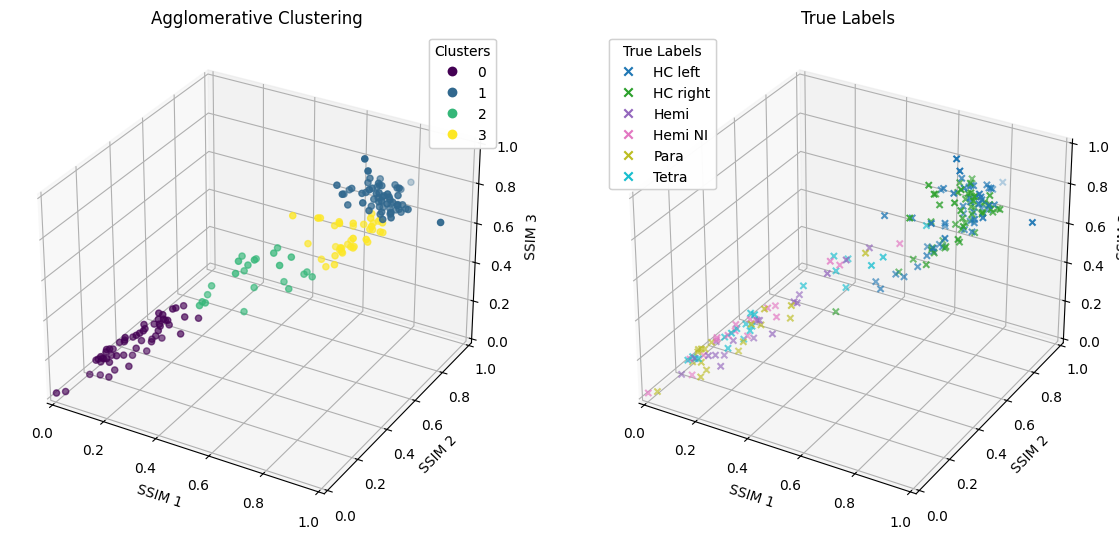

In [25]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_ssim[['SSIM 1', 'SSIM 2', 'SSIM 3']])
data_scaled = pd.DataFrame(data_scaled, columns=['SSIM 1', 'SSIM 2', 'SSIM 3'])

all_ssim['Cluster'] = AgglomerativeClustering(n_clusters=4).fit_predict(data_scaled)
                                                                
# Set up the 3D plot
fig = plt.figure(figsize=(14, 8))

# Subplot for clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(all_ssim['SSIM 1'], all_ssim['SSIM 2'], all_ssim['SSIM 3'], 
                       c=all_ssim['Cluster'], cmap='viridis', marker='o')
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('SSIM 1')
ax1.set_ylabel('SSIM 2')
ax1.set_zlabel('SSIM 3')
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))
ax1.set_zlim((0, 1))
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# Subplot for true labels

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(true_label['SSIM 1'], true_label['SSIM 2'], true_label['SSIM 3'], 
                       c=true_label['Disease Group Encoded'], cmap='tab10', marker='x')
# for i, row in true_label.iterrows():
#     ax2.text(row['SSIM 1'], row['SSIM 2'], row['SSIM 3'], str(i), fontsize=7)

ax2.set_title('True Labels')
ax2.set_xlabel('SSIM 1')
ax2.set_ylabel('SSIM 2')
ax2.set_zlabel('SSIM 3')
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))
ax2.set_zlim((0, 1))

# Create a custom legend for true labels
unique_labels = le_ssim.classes_
handles = scatter2.legend_elements()[0]
labels = unique_labels  # Directly use unique labels
legend2 = ax2.legend(handles, labels, title="True Labels")
ax2.add_artist(legend2)

plt.show()

### SSIM per Population Group

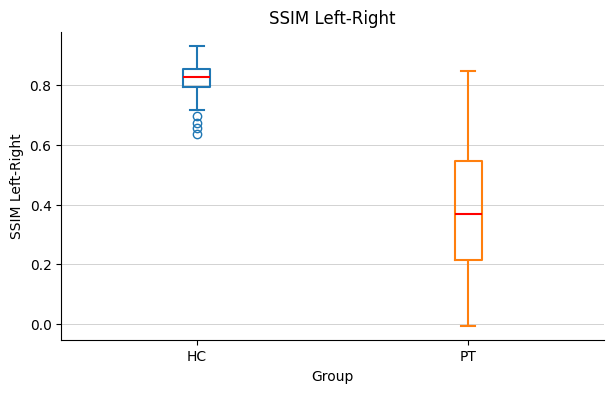

In [46]:
df_metasig_intp_HC['Group'] = 'HC'
df_metasig_intp_PT['Group'] = 'PT'
combined_df = pd.concat([df_metasig_intp_HC, df_metasig_intp_PT])
combined_df= combined_df.dropna(subset=['SSIM Left-Right'])
combined_df['Disease Group'] = combined_df['Disease Group'].replace('HC left', 'HC')
order = combined_df.groupby(['Group'])['SSIM Left-Right'].median().sort_values(ascending=False).index
fig, axs = plt.subplots(figsize=(7, 4))
sns.boxplot(data=combined_df, x='Group', y='SSIM Left-Right', order=order,
            width=0.1, fill=False, hue='Group',
            medianprops={"color": "r"})
axs.spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linewidth=0.4)
plt.title('SSIM Left-Right')
plt.show()

### SSIM per Pathological Type

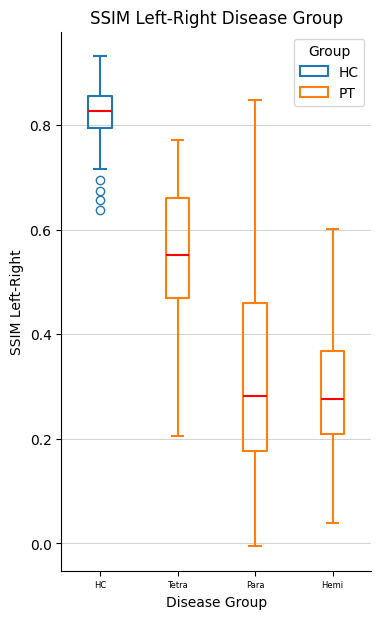

In [47]:
fig, axs = plt.subplots(figsize=(4, 7))
order = combined_df.groupby(['Disease Group'])['SSIM Left-Right'].median().sort_values(ascending=False).index
sns.boxplot(data=combined_df, x='Disease Group', y='SSIM Left-Right', order=order,
            width=0.3, fill=False, hue='Group',
            medianprops={"color": "r"})
axs.spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linewidth=0.4, which = 'both')
plt.xticks(fontsize=6)
plt.title('SSIM Left-Right Disease Group')
plt.show()

In [53]:
cols = ['Group', 'Disease Group', 'SSIM Left-Right']
print(combined_df[cols])


    Group Disease Group  SSIM Left-Right
1      HC            HC         0.825184
2      HC            HC         0.864367
3      HC            HC         0.832676
4      HC            HC         0.636869
5      HC            HC         0.889447
..    ...           ...              ...
SV     PT          Hemi         0.594723
SJ     PT          Hemi         0.073703
TH     PT          Hemi         0.122051
TC     PT         Tetra         0.536776
ZSN    PT          Hemi         0.601715

[90 rows x 3 columns]
